In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [8]:
try:
    # Carregando os dados do primeiro arquivo
    df_geo = pd.read_csv( 'performance_voronoi.csv' )
    print( "\nDados do Algoritmo Geométrico:" )
    print( df_geo.head() )

    print( "-" * 30 )

    # Carregando os dados do segundo arquivo
    df_pix = pd.read_csv( 'performance_voronoi_pixel.csv' )
    print( "Dados do Algoritmo Pixel-based:" )
    print( df_pix.head() )

except FileNotFoundError:
    print( "Erro: Certifique-se de que os dois arquivos CSV foram enviados corretamente." )


Dados do Algoritmo Geométrico:
   numPontos  tempoMs
0          1      1.0
1          2      1.0
2          3      0.0
3          4      1.0
4          5      0.0
------------------------------
Dados do Algoritmo Pixel-based:
   numPontos  tempoMs
0          1     18.0
1          2     18.0
2          3     18.0
3          4     19.0
4          5     19.0



Gerando o gráfico de desempenho comparativo...


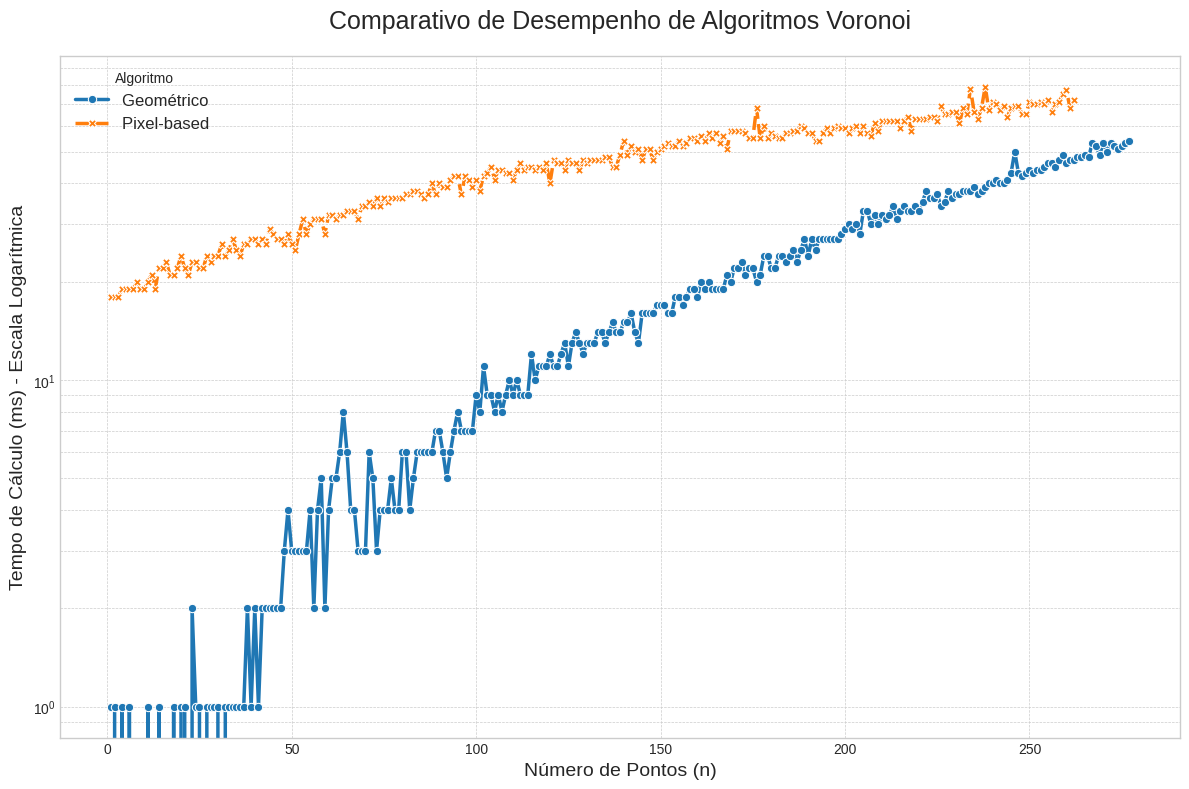

In [10]:

df_geo['algoritmo'] = 'Geométrico '
df_pix['algoritmo'] = 'Pixel-based '
df_combined = pd.concat([df_geo, df_pix])

# --- Geração do Gráfico ---
print( "\nGerando o gráfico de desempenho comparativo..." )
plt.style.use( 'seaborn-v0_8-whitegrid' )
fig, ax = plt.subplots( figsize=( 12, 8 ) )

# O Seaborn utiliza a coluna 'algoritmo' para criar as duas linhas e a legenda
sns.lineplot(
    data=df_combined,
    x='numPontos',
    y='tempoMs',
    hue='algoritmo', # Cria uma linha para cada algoritmo
    style='algoritmo',
    markers=True,
    linewidth=2.5,
    ax=ax
)

ax.set_title( 'Comparativo de Desempenho de Algoritmos Voronoi', fontsize=18, pad=20 )
ax.set_xlabel( 'Número de Pontos (n)', fontsize=14 )
ax.set_ylabel( 'Tempo de Cálculo (ms) - Escala Logarítmica', fontsize=14 )
ax.legend( title='Algoritmo', fontsize=12 )
ax.grid( True, which='both', linestyle='--', linewidth=0.5 )

ax.set_yscale( 'log' )

plt.tight_layout()
plt.show()